In [1]:
import numpy as np
import os
import cv2
import h5py

In [2]:
Random_Crop = 30
Patch_size = 32
label_size = 20
conv_side = 6
factor = 2 

In [3]:
def prepare_data(path):
    names = os.listdir(path)  # data 이름들을 차례대로 불러옴
    names = sorted(names)     # data 이름순으로 정리
    nums = names.__len__()    # data의 길이
    
    # crop해서 저장할 데이터 셋을 설정
    data = np.zeros((nums * Random_Crop, 1, Patch_size, Patch_size), dtype=np.double)     # data = zeros(14*30, 1, 32, 32) 
    label = np.zeros((nums * Random_Crop, 1, label_size, label_size), dtype=np.double)    # label = zeros(14*30, 1, 20, 20)  

    for i in range(nums):
        name = path + names[i]                                   # name에 data를 차례대로 불러옴 
        hr_img = cv2.imread(name, cv2.IMREAD_COLOR)              # hr_img = output에 들어갈 원래의 이미지
        
        # 이미지 data에서 w, h만 추출
        hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
        hr_img = hr_img[:, :, 0]
        
        # 저화질 이미지 생성
        w, h = hr_img.shape
        new_height = int(h / factor)
        new_width = int(w / factor)
        lr_img = cv2.resize(hr_img, (new_height, new_width))
        lr_img = cv2.resize(lr_img, h, w)

        # produce Random_Crop random coordinate to crop training img
        Points_x = np.random.randint(0, min(w, h) - Patch_size, Random_Crop)        # points_x = random(0, 낮은 값 - 32, 30)
        Points_y = np.random.randint(0, min(w, h) - Patch_size, Random_Crop)        # points_y = random(0, 낮은 값 - 32, 30)
        
        # 이미지 단일화
        for j in range(Random_Crop):
            lr_patch = lr_img[Points_x[j]: Points_x[j] + Patch_size, Points_y[j]: Points_y[j] + Patch_size]            # lr_patch = (n번째 + 32, n번째 + 32)
            hr_patch = hr_img[Points_x[j]: Points_x[j] + Patch_size, Points_y[j]: Points_y[j] + Patch_size]

            lr_patch = lr_patch.astype(float) / 255.
            hr_patch = hr_patch.astype(float) / 255.

            data[i * Random_Crop + j, 0, :, :] = lr_patch
            label[i * Random_Crop + j, 0, :, :] = hr_patch[conv_side: -conv_side, conv_side: -conv_side]
            # cv2.imshow("lr", lr_patch)
            # cv2.imshow("hr", hr_patch)
            # cv2.waitKey(0)
    return data, label

TypeError: Invalid shape (30,) for image data

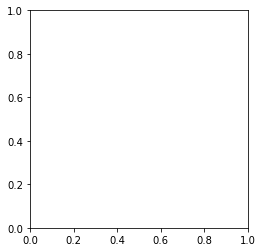

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randint(0, 255 - Patch_size, Random_Crop)

plt.imshow(x)
plt.show()  

